E-Commerce Analytics

Business Problems
 1. Calculate the monthly sales of the store and identify which month had the highest and the lowest sales
 2. Analyze sales based on product categories and determine which category has the lowest sale and highest sales
 3. The sales Analytics needs to be done based on sub-categories
 4. Analyze the monthly profit from sales and detarmine which month had the highest profit
 5. Analyze the profit by category and sub-category
 6. Analyze the sales and profit by customer segment
 7. Analyze the sales and profit ratio.


In [133]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = 'plotly_white'

In [13]:
data=pd.read_csv("C:/Users/hp/Downloads/SampleSuperstore.csv", encoding='latin=1')
data.head()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [31]:
#No Null Values
#Convert date columns to proper dtype
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [33]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [35]:
#To do the  detailed monthly analysis we have to create 3 columns

data['Order Month']=data['Order Date'].dt.month
data['Order year']= data['Order Date'].dt.year
data['Order Day of Week']=data['Order Date'].dt.dayofweek

In [37]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [49]:
#Monthly Sales Analysis

sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
print(sales_by_month)

    Order Month        Sales
0             1   94924.8356
1             2   59751.2514
2             3  205005.4888
3             4  137762.1286
4             5  155028.8117
5             6  152718.6793
6             7  147238.0970
7             8  159044.0630
8             9  307649.9457
9            10  200322.9847
10           11  352461.0710
11           12  325293.5035


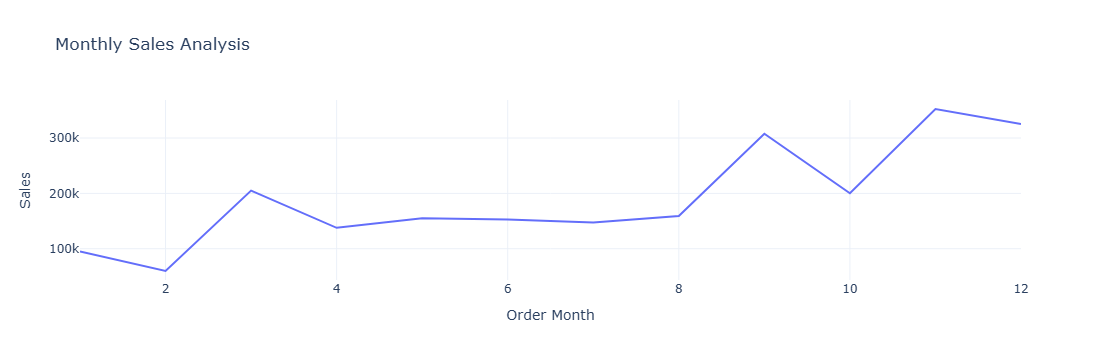

In [63]:
fig=px.line(sales_by_month, x='Order Month',y='Sales',title= 'Monthly Sales Analysis')
fig.show()

In [67]:
#Sales by Product Categories

sales_by_category= data.groupby('Category')['Sales'].sum().reset_index()
print(sales_by_category)

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


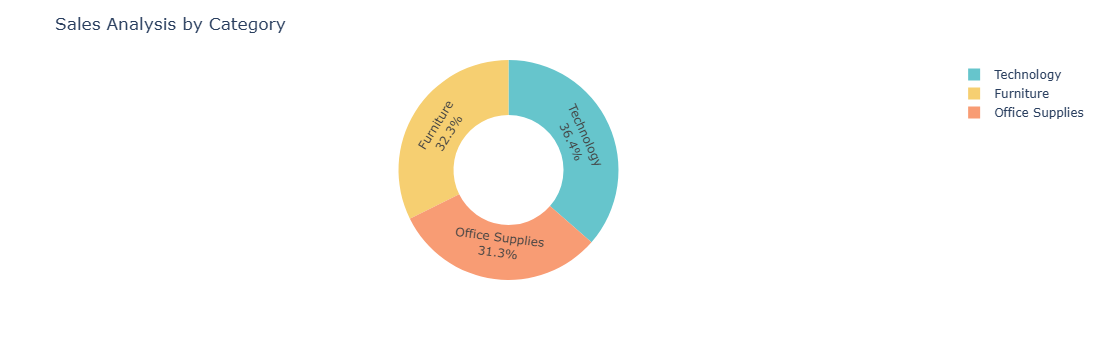

In [79]:
fig=px.pie(sales_by_category, values='Sales', names='Category',hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Sales Analysis by Category')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

In [85]:
#Sales Analysis by Sub category

sales_by_subcategory= data.groupby('Sub-Category')['Sales'].sum().reset_index()
print(sales_by_subcategory)

   Sub-Category        Sales
0   Accessories  167380.3180
1    Appliances  107532.1610
2           Art   27118.7920
3       Binders  203412.7330
4     Bookcases  114879.9963
5        Chairs  328449.1030
6       Copiers  149528.0300
7     Envelopes   16476.4020
8     Fasteners    3024.2800
9   Furnishings   91705.1640
10       Labels   12486.3120
11     Machines  189238.6310
12        Paper   78479.2060
13       Phones  330007.0540
14      Storage  223843.6080
15     Supplies   46673.5380
16       Tables  206965.5320


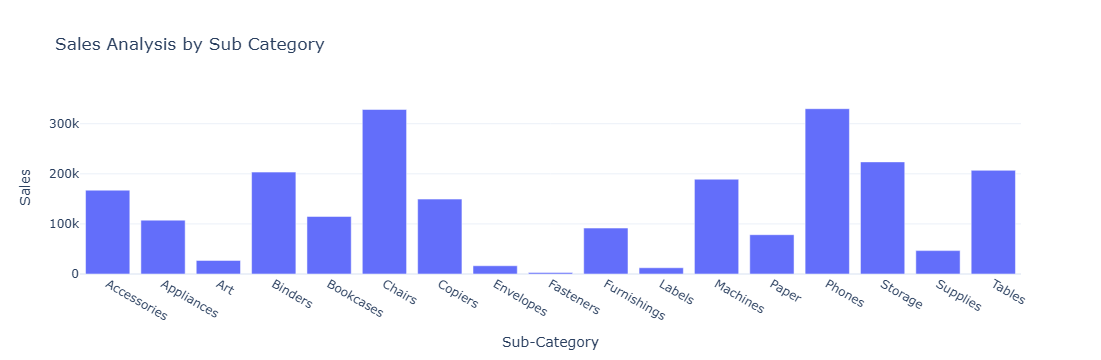

In [93]:
fig=px.bar(sales_by_subcategory, x='Sub-Category', y='Sales', title='Sales Analysis by Sub Category')
fig.show()

In [97]:
#Profit Analysis by Month

profit_by_month= data.groupby('Order Month')['Profit'].sum().reset_index()
print(profit_by_month)

    Order Month      Profit
0             1   9134.4461
1             2  10294.6107
2             3  28594.6872
3             4  11587.4363
4             5  22411.3078
5             6  21285.7954
6             7  13832.6648
7             8  21776.9384
8             9  36857.4753
9            10  31784.0413
10           11  35468.4265
11           12  43369.1919


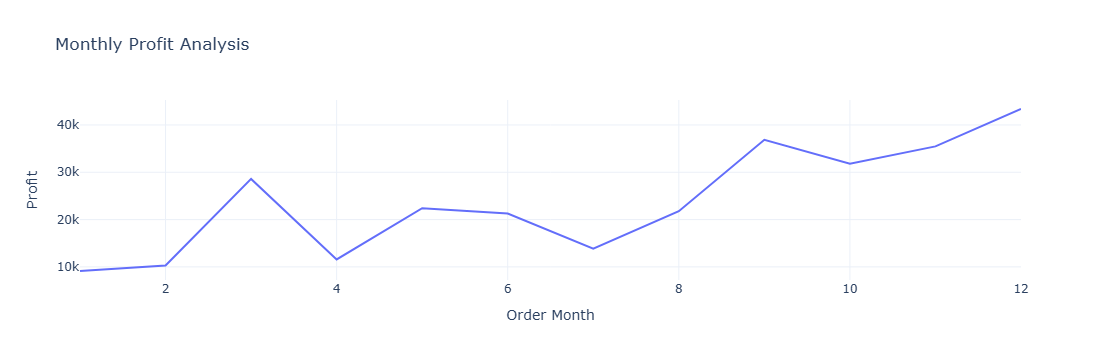

In [99]:
fig= px.line(profit_by_month, x='Order Month', y= 'Profit', title= 'Monthly Profit Analysis')
fig.show()

In [103]:
#Profit by Category
profit_by_category= data.groupby('Category')['Profit'].sum().reset_index()
print(profit_by_category)

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


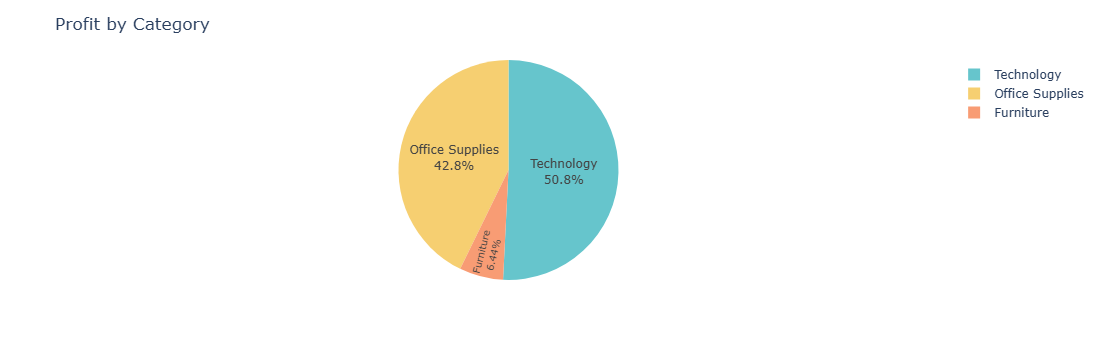

In [113]:
fig= px.pie(profit_by_category, values='Profit', names='Category',color_discrete_sequence=colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit by Category')
fig.show()

In [115]:
#Profit Analysis by Sub Categories

profit_by_subcategory=data.groupby('Sub-Category')['Profit'].sum().reset_index()
print(profit_by_subcategory)

   Sub-Category      Profit
0   Accessories  41936.6357
1    Appliances  18138.0054
2           Art   6527.7870
3       Binders  30221.7633
4     Bookcases  -3472.5560
5        Chairs  26590.1663
6       Copiers  55617.8249
7     Envelopes   6964.1767
8     Fasteners    949.5182
9   Furnishings  13059.1436
10       Labels   5546.2540
11     Machines   3384.7569
12        Paper  34053.5693
13       Phones  44515.7306
14      Storage  21278.8264
15     Supplies  -1189.0995
16       Tables -17725.4811


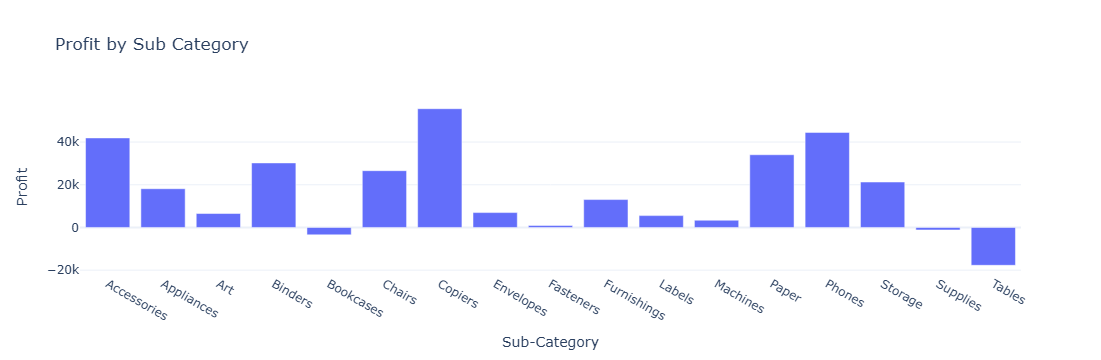

In [117]:
fig=px.bar(profit_by_subcategory,x='Sub-Category',y='Profit',title='Profit by Sub Category')
fig.show()

In [123]:
#Sales and Profit Analysis by Customer segment

sales_profit_by_segment=data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
print(sales_profit_by_segment)

       Segment         Sales       Profit
0     Consumer  1.161401e+06  134119.2092
1    Corporate  7.061464e+05   91979.1340
2  Home Office  4.296531e+05   60298.6785


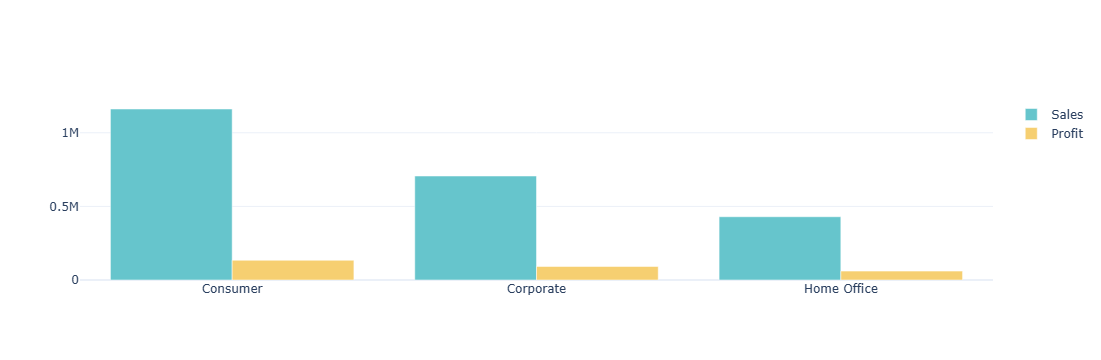

In [141]:
fig=go.Figure()

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                         y=sales_profit_by_segment['Sales'],
                         name='Sales',
                         marker_color=colors.qualitative.Pastel[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                     y=sales_profit_by_segment['Profit'],
                     name='Profit',
                     marker_color=colors.qualitative.Pastel[1]))

fig.show()

In [165]:
#Sales Profit Ratio by Segment
sales_profit_by_segment
sales_profit_by_segment['Sales Profit Ratio']= sales_profit_by_segment['Sales']/sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment','Sales Profit Ratio']])

       Segment  Sales Profit Ratio
0     Consumer            8.659471
1    Corporate            7.677245
2  Home Office            7.125416
